## Lengthscale calculation: Stable 05 m/s 
## Code: `Nalu-Wind`
## Mesh: 2.5x2.5x2.5m

### Computing turbulent lengthscales

The two point correlation $R_{ij}$ is defined as
$$ R_{ij}({\mathbf x},\boldsymbol{\xi}) = 
\frac{\langle {u'_i(\mathbf{x}, t) u'_j(\mathbf{x}+\boldsymbol{\xi},t)} \rangle}
{ \sqrt{\langle u'^2_i \rangle} \sqrt{\langle u'^2_j \rangle}} $$

The fluctuations
$$ u'_i(\mathbf{x},t) = u_i(\mathbf{x},t) - \langle u_i(\mathbf{x},t) \rangle $$

The lengthscale is calculated as
$$ L = \int_0^\infty R_{ij}(\xi)\: {\textrm d}\xi  $$

See https://spiral.imperial.ac.uk/bitstream/10044/1/41599/4/Airflow_v16a_Revised25_final_deposit.pdf as a reference

In [1]:
%%capture
# Important header information
naluhelperdir = '../../../../Postprocessing/utilities/'
import sys
# Change some display properties
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
import matplotlib.pyplot as plt
import numpy as np
sys.path.insert(1, naluhelperdir)
import correlate as corr
from matplotlib.lines import Line2D
%matplotlib inline

In [2]:
# Set the parameters
prefix='stable05'
basedir='rundir/sliceData'
filebase='HHplane_%07i_0.dat'

#iters=np.arange(30000,31000, 8)   # N=125
#iters=np.arange(30001,40001, 100) # N=100
#iters=np.arange(40000,50000, 20)  # 500
iters=np.arange(30000,39900, 8) # 1250

loadfromplanes = False  # If True, calculate the average from individual plane files.  If False, load from avgsavefile
plotprobept    = True   # If True, plot the probe locations
iplane = 1
ij   = [0,0]

avgsavefile     = prefix+'_avgplane_%i_%i_%i.dat'%(iters[0],iters[-1],len(iters))
Rijsavefile     = prefix+'_avgRij_%i_%i_%i_iplane_%i.dat'%(iters[0],iters[-1],len(iters),iplane)

In [3]:
# Construct the file list
filelist=[basedir+'/'+filebase%i for i in iters]

In [4]:
# Load the average (compute if needed)
avgdat, headers       = corr.loadavg(filelist, loadfromplanes, avgsavefile, verbose=True)
ws, winddir           = corr.getavgwind(avgdat, headers, iplane)
print('WS   = '+repr(ws))
print('Wdir = '+repr(winddir))
if loadfromplanes: loadfromplanes = False # Don't need to compute any more after this

WS   = [4.1686972088227003, 3.8837054181983834, -0.00058672070089591476]
Wdir = 227.0269744104686


In [5]:
# Create the probe list for LONGITUDINAL
# Set parameters
#winddir= 225
if (winddir>270): s=-1
else:             s=+1
startx = np.arange(0,201,10)
starty = np.arange(0,201,10)[::s]
probelength = 400 # Probe length should be a few hundred meters
startp = []
yoffset=0
[[startp.append([x,y+yoffset*iy,iplane]) for x in startx] for iy, y in enumerate(starty)]

plistLONG = corr.makeprobeline(startp, winddir, probelength, avgdat)

Nlong      = len(plistLONG)
print("Len(plist)=%i"%Nlong)

Len(plist)=441


In [6]:
# Create the probe list for LATERAL
# Set parameters
#winddir= 315
winddir = winddir+90.0
if (winddir>270): s=-1
else:             s=+1
startx = np.arange(0,201,10)
starty = np.arange(0,201,10)[::s]
probelength = 400 # Probe length should may be 0.5*domain length
startp = []
yoffset=0
[[startp.append([x,y+yoffset*iy,iplane]) for x in startx] for iy, y in enumerate(starty)]

plistLAT = corr.makeprobeline(startp, winddir, probelength, avgdat)

Nlat     = len(plistLAT)
print("Len(plist)=%i"%Nlat)

Len(plist)=441


100%Done
100%Done


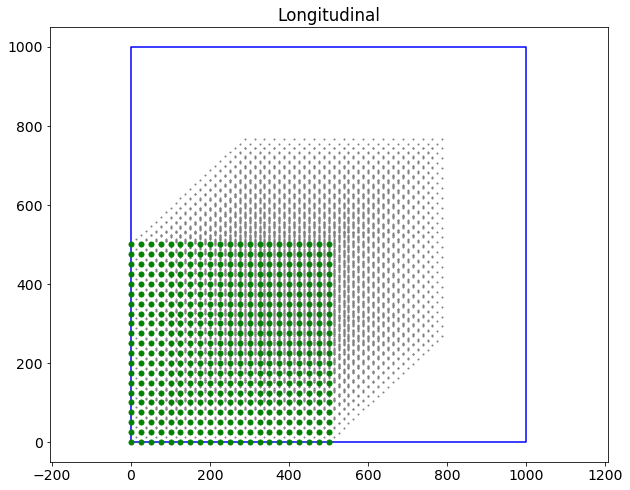

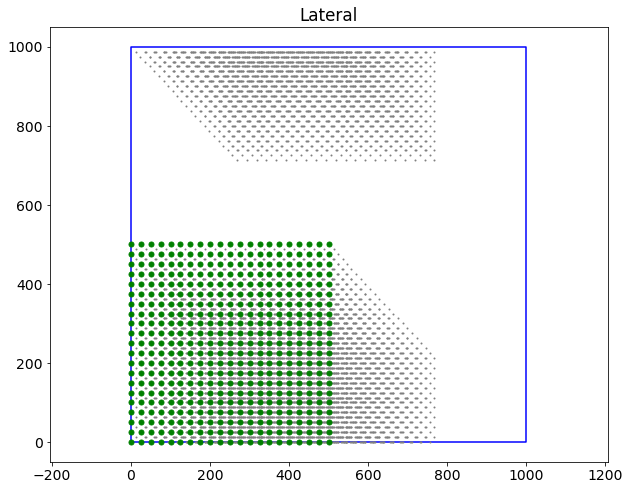

In [ ]:
# Plot the probe points
if plotprobept:
    avgdat, headers       = corr.loadavg(filelist, loadfromplanes, avgsavefile, verbose=True)
    # LONG
    plt.figure(figsize=(10,8))
    plt.rc('font', size=14)
    corr.plotprobes(plistLONG, avgdat, headers, verbose=True, skip=5)
    print("Done")
    plt.title('Longitudinal')
    plt.axis('equal')
    # LAT
    plt.figure(figsize=(10,8))
    plt.rc('font', size=14)
    corr.plotprobes(plistLAT, avgdat, headers, verbose=True, skip=5)
    print("Done")
    plt.title('Lateral')
    plt.axis('equal')

In [ ]:
plist        = plistLONG + plistLAT
allf, allRij = corr.makeRij(ij, plist, filelist, loadfromplanes, avgsavefile, verbose=True)

Computing [1/1238]: HHplane_0030000_0.dat
Computing [2/1238]: HHplane_0030008_0.dat
Computing [3/1238]: HHplane_0030016_0.dat
Computing [4/1238]: HHplane_0030024_0.dat
Computing [5/1238]: HHplane_0030032_0.dat
Computing [6/1238]: HHplane_0030040_0.dat
Computing [7/1238]: HHplane_0030048_0.dat
Computing [8/1238]: HHplane_0030056_0.dat
Computing [9/1238]: HHplane_0030064_0.dat
Computing [10/1238]: HHplane_0030072_0.dat
Computing [11/1238]: HHplane_0030080_0.dat
Computing [12/1238]: HHplane_0030088_0.dat
Computing [13/1238]: HHplane_0030096_0.dat
Computing [14/1238]: HHplane_0030104_0.dat
Computing [15/1238]: HHplane_0030112_0.dat
Computing [16/1238]: HHplane_0030120_0.dat
Computing [17/1238]: HHplane_0030128_0.dat
Computing [18/1238]: HHplane_0030136_0.dat
Computing [19/1238]: HHplane_0030144_0.dat
Computing [20/1238]: HHplane_0030152_0.dat
Computing [21/1238]: HHplane_0030160_0.dat
Computing [22/1238]: HHplane_0030168_0.dat
Computing [23/1238]: HHplane_0030176_0.dat
Computing [24/1238]:

In [ ]:
# Split it back into LONG/LAT
avgRijLong   = np.mean(allRij[:Nlong], axis=0)
avgRijLat    = np.mean(allRij[Nlong:], axis=0)

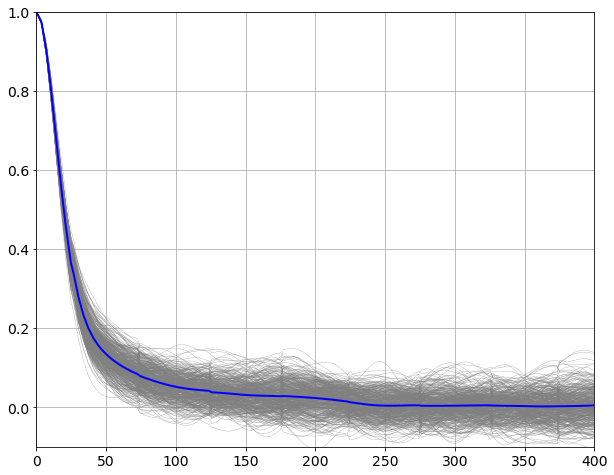

In [ ]:
# Plot the LONG Rij
plt.figure(figsize=(10,8))
plt.rc('font', size=14)

for ir, Rij in  enumerate(allRij[:Nlong]):
    plt.plot(allf[Nlong], Rij, 'gray', lw=0.25)
# Average
plt.plot(allf[Nlong], avgRijLong, 'b', lw=2)
plt.ylim([-0.1, 1])
plt.xlim([0, probelength])
plt.grid()

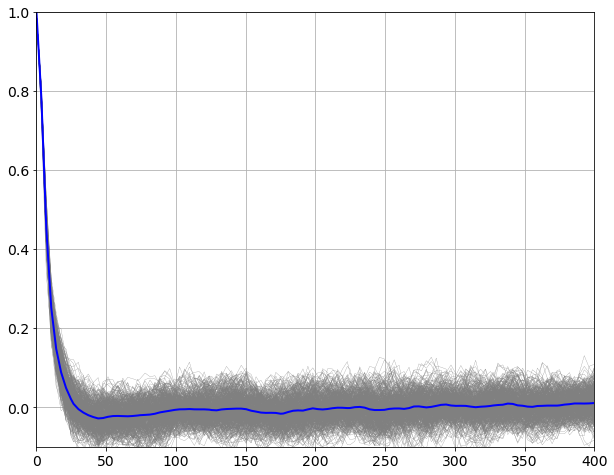

In [ ]:
# Plot the LAT Rij
plt.figure(figsize=(10,8))
plt.rc('font', size=14)

for ir, Rij in  enumerate(allRij[Nlong:]):
    plt.plot(allf[Nlong], Rij, 'gray', lw=0.25)
# Average
plt.plot(allf[Nlong], avgRijLat, 'b', lw=2)
plt.ylim([-0.1, 1])
plt.xlim([0, probelength])
plt.grid()

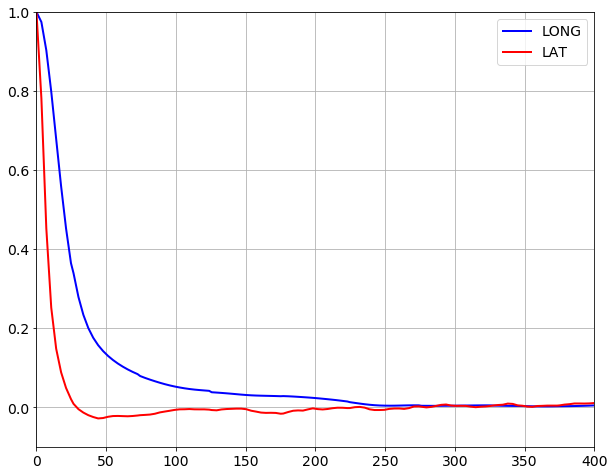

In [ ]:
# Plot the LONG+LAT Rij
plt.figure(figsize=(10,8))
plt.rc('font', size=14)

# Average
plt.plot(allf[0], avgRijLong, 'b', lw=2, label='LONG')
plt.plot(allf[Nlong], avgRijLat,  'r', lw=2, label='LAT')
plt.ylim([-0.1, 1])
plt.xlim([0, probelength])
plt.grid()
plt.legend()

In [ ]:
# Calculate lengthscale
lengthscale = corr.calclengthscale(allf[0], avgRijLong, max=len(avgRijLong))
print('LONG lengthscale = %f'%lengthscale)
lengthscale = corr.calclengthscale(allf[Nlong], avgRijLat)
print('LAT lengthscale  = %f'%lengthscale)

In [ ]:
# Save the information
savedat=np.vstack((allf[0], avgRijLong, allf[Nlong], avgRijLat)).transpose()
np.savetxt(Rijsavefile,savedat,header="Xi, RijLong, Xi, RijLat")